Ce fichier à pour but d'inventer des résultats crédibles pour le cour de démarche scientifique du Master en Biogéosciences 2023.

Ce code analyse les résultats dans la foulée.

Ce code n'a pas vocation à être réutilisé

Tentative de génération de résultats

In [ ]:
# Cellule pour installer les modules requis dans google lab
# Attention cela n'importe pas le module dans le fichier
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.4 MB/s eta 0:00:00


Test de génération de données crédibles avec biopython

On utilise le format FASTA qui est un format assez simple à utiliser et assez pratique pour la biologie

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Bio import SeqIO
from Bio import Entrez
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows


import random
from random import sample

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Remplacez par votre adresse email. Cela est nécessaire pour accéder aux données GenBank.
Entrez.email = "uneadresseemailrandom@gmail.com"


In [ ]:
# Liste d'identifiants NCBI de 16S bactériens (exemples)
selected_ids = ["NR_025230", "NR_041801", "NR_026150", "NR_115819", "NR_044085", "NR_043801", "NR_029690", "NR_024570", "NR_115818", "NR_025227"]


with open("test_bact.fasta", "w") as output_file:
    for seq_id in selected_ids:
        handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="gb", retmode="text")
        record = SeqIO.read(handle, "genbank")
        handle.close()

        SeqIO.write(record, output_file, "fasta")

print("Fichier FASTA généré avec succès: \n")


fasta_file = "test_bact.fasta"

sequences = list(SeqIO.parse(fasta_file, "fasta"))


for record in sequences:
    print("ID:", record.id)
    print("Description:", record.description)
    print("Sequence:", str(record.seq))
    print()



Fichier FASTA généré avec succès: 

ID: NR_025230.1
Description: NR_025230.1 Megasphaera micronuciformis strain AIP 412.00 16S ribosomal RNA, partial sequence
Sequence: GAAAGCTTGCTTTTTCTACAATCTAGTGGCAAACGGGTGAGTAACGCGTAAACAACCTGCCCTACGGATGGGGACAACAGCTGGAAACGGCTGCTAATACCGAATACGTTCCGAAAGTCGCATGACTGTCGGAAGAAAGGATGGCCTCTATTTATAAGCTATCGCCGGAGGAGGGGTTTGCGTCTGATTAGCTAGTTGGAGGGGTAACGGCCCACCAAGGCGACGATCAGTAGCCGGTCTGAGAGGATGAACGGCCACATTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGCGTGAGTGAAGACGGCCTTCGGGTTGTAAAGCTCTGTTATACGGGACGAATAATCTTGTGGTTAATACCCATAAGAAGTGACGGTACCGTAAGAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCGCGCAGGCGGCTTCTTAAGTCTGTCTTAAAAGTGCGGGGCTTAACCCCGTGATGGGATGGAAACTGGGAAGCTCAGAGTATCGGAGAGGAAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAAGCGGCTTTTCTGGACGAAAACTGACGCTGAGGCGCGAAAGCCAGGGGAGCGAACGGGATTAGATACCCCGGTAGTCCTGGCCGTAAACGATGGGTACTAGGTGTAGGAGGTATCGACCCCTTCTGTGCCGGAGTTAACGCAATAAGTACCCCGCCT

In [ ]:
# Ce code va chercher toutes les séquences 18S de protistes
'''
search_term = "18S ribosomal RNA[Gene] AND protists[filter]"  # Recherche de gènes 18S chez les protistes


handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=10000)
record = Entrez.read(handle)
handle.close()

identifiers = record["IdList"]

with open("test_prot.fasta", "w") as output_file:
  for identifier in identifiers:
      handle = Entrez.efetch(db="nucleotide", id=identifier, rettype="gb", retmode="text")
      record = SeqIO.read(handle, "genbank")
      handle.close()

      SeqIO.write(record, output_file, "fasta")

print("Fichier FASTA généré avec succès: \n")


fasta_file = "test_prot.fasta"

sequences = list(SeqIO.parse(fasta_file, "fasta"))

for record in sequences:
    print("ID:", record.id)
    print("Description:", record.description)
    print("Sequence:", str(record.seq))
    print()
'''

'\nsearch_term = "18S ribosomal RNA[Gene] AND protists[filter]"  # Recherche de gènes 18S chez les protistes\n\n\nhandle = Entrez.esearch(db="nucleotide", term=search_term, retmax=10000)\nrecord = Entrez.read(handle)\nhandle.close()\n\nidentifiers = record["IdList"]\n\nwith open("test_prot.fasta", "w") as output_file:\n  for identifier in identifiers:\n      handle = Entrez.efetch(db="nucleotide", id=identifier, rettype="gb", retmode="text")\n      record = SeqIO.read(handle, "genbank")\n      handle.close()\n\n      SeqIO.write(record, output_file, "fasta")\n\nprint("Fichier FASTA généré avec succès: \n")\n\n\nfasta_file = "test_prot.fasta"\n\nsequences = list(SeqIO.parse(fasta_file, "fasta"))\n\nfor record in sequences:\n    print("ID:", record.id)\n    print("Description:", record.description)\n    print("Sequence:", str(record.seq))\n    print()\n'

Invention de résultats

On as donc:
4 échantillons composite tous le mois
3 clades à étudier avec pour chacun de ces clades un marqueur spécifique


Bactéries 16S

Champignons ITS

Protistes 18S

---

On va partir du principe que nos hypothèses seront correctes sauf pour la biodynamie qui ne sera pas significativement différente de l'agriculture biologique normale

---
Stratégie:

Créer une liste d'espèce, en se basant sur GenBank. Pour certains groupes, on sera obligé de créer des espèces fictives qui seront seront déclarée comme espèces inconnues. Les espèces fictive seront créé à partir de léger changement dans les séquences d'espèces existantes.



Pour simuler une évlution des données je vais créer des vecteurs pour chaque groupe d'organisme et pour chaque type de culture, qui simuleront l'évolution de ces groupes d'organismes à travers le temps, je vais créer un petit algo qui permet de faire évoluer le vecteur dans le sens qu'on choisit mais qui fait attention de conserver les même espèces.

In [ ]:
class FileManager:
  def __init__(self, search_term, organism):
    self.search_term = search_term
    self.organism = organism
    self.fasta_file = f'selected_{self.organism}.fasta'
    self.nucleotides = ['A','C','G','T']

  def create_file(self):
    handle = Entrez.esearch(db="nucleotide", term=self.search_term, retmax=10000)
    record = Entrez.read(handle)
    handle.close()

    identifiers = record["IdList"]

    with open(f"selected_{self.organism}.fasta", "w") as output_file:
      for identifier in identifiers:
          handle = Entrez.efetch(db="nucleotide", id=identifier, rettype="gb", retmode="text")
          record = SeqIO.read(handle, "genbank")
          handle.close()
          SeqIO.write(record, output_file, "fasta")

    print("Fichier FASTA généré avec succès: \n")
    return f"selected_{self.organism}.fasta"

  def read_file(self):
    sequences = list(SeqIO.parse(self.fasta_file, "fasta"))

    for record in sequences:
      print("ID:", record.id)
      print("Description:", record.description)
      print("Sequence:", str(record.seq))
      print()

  def artificial_individual(self):
        sequences = list(SeqIO.parse(self.fasta_file, "fasta"))

        if len(sequences) == 0:
            print("Aucune séquence disponible dans le fichier FASTA.")
            return

        existing_individual = random.choice(sequences)
        artificial_id = str(random.randint(10**9, 10**10 - 1))
        artificial_description = f"Individu inconnu du groupe {self.organism}"
        num_mutations = random.randint(1, 10)

        artificial_sequence = list(existing_individual.seq)

        # Modifiez aléatoirement les nucléotides
        for _ in range(num_mutations):
            position_to_mutate = random.randint(0, len(artificial_sequence) - 1)
            new_nucleotide = random.choice(self.nucleotides)
            artificial_sequence[position_to_mutate] = new_nucleotide

        # Créez un enregistrement SeqRecord pour l'individu artificiel
        artificial_record = SeqRecord(Seq(''.join(artificial_sequence)), id=artificial_id, description=artificial_description)
        artificial_record.annotations["molecule_type"] = "DNA"  # Spécifiez le type de molécule

        # Ajoutez l'individu artificiel à la liste des séquences
        sequences.append(artificial_record)

        # Sauvegardez la nouvelle liste de séquences dans le fichier FASTA
        SeqIO.write(sequences, self.fasta_file, "fasta")

  def count_individuals(self):
        # Charger les séquences du fichier FASTA
        sequences = list(SeqIO.parse(self.fasta_file, "fasta"))

        # Compter le nombre d'individus
        num_individuals = len(sequences)

        print(f"Le fichier FASTA '{self.fasta_file}' contient {num_individuals} individus.")
        return num_individuals


In [ ]:
search_term_fungi = 'ITS sequence[Title] AND "Fungi"[Organism]'

champis = FileManager(search_term_fungi, 'fungi')
champis.create_file()
for i in range(50):
  champis.artificial_individual()
champis.count_individuals()

Fichier FASTA généré avec succès: 

Le fichier FASTA 'selected_fungi.fasta' contient 52 individus.


52

In [ ]:
search_term_protist = "18S ribosomal RNA[Gene] AND protists[filter]"

protist = FileManager(search_term_protist, 'protist')
protist.create_file()
protist.count_individuals()

Fichier FASTA généré avec succès: 

Le fichier FASTA 'selected_protist.fasta' contient 90 individus.


90

In [ ]:
def create_bacterial_individuals(output_file, num_individuals):
    nucleotides = ['A', 'C', 'G', 'T']
    template_sequence = "AGTAATACCCAATCCTGACACAGGGAGGTAGTGACAAGAAATAACAATACAGGGCAATAGTCTTGTAATTGGAATGATGCCGATTAAAAATTCCGGCAGAGTACCAATTGGAGGGCAAGTCTGGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAACTTGTTGCAGTTAAAAAGCTCGTAGTTGAATTTCAGCGATTCTGTCATTATACCATGTGGTGTATTGTCGGTTTCGCCTTTTGTATTACTTTGAGAAAAATAGAGTGTTTCAAGCAGACTTTTGTCTTGAATAGTGTAGCATGGAATAATAGAGTAGGACGGATTTCCTATTTTGTTGGTTTGCGGTGTCCGTAATGGGTAATAGGAACGGTTGGGGGCATTCGTATTTAA"

    with open(output_file, "w") as fasta_file:
        for i in range(num_individuals):
            artificial_sequence = list(template_sequence)
            num_mutations = random.randint(1, 10)

            for _ in range(num_mutations):
                position_to_mutate = random.randint(0, len(artificial_sequence) - 1)
                new_nucleotide = random.choice(nucleotides)
                artificial_sequence[position_to_mutate] = new_nucleotide

            artificial_sequence = ''.join(artificial_sequence)
            artificial_id = f"Artificial_{i + 1}"
            description = f"Artificial Bacterial Individual {i + 1}"

            record = SeqRecord(Seq(artificial_sequence), id=artificial_id, description=description)
            SeqIO.write(record, fasta_file, "fasta")

bacteria = 'selected_bacteria.fasta'

create_bacterial_individuals(bacteria, 150)

def open_fasta_file(file_path):
    """
    Ouvre un fichier FASTA et retourne une liste d'objets SeqRecord.
    Args:
        file_path (str): Chemin vers le fichier FASTA.
    Returns:
        list: Liste d'objets SeqRecord.
    """
    try:
        sequences = list(SeqIO.parse(file_path, "fasta"))
        return sequences
    except FileNotFoundError:
        print(f"Le fichier {file_path} n'a pas été trouvé.")
        return []
    except Exception as e:
        print(f"Une erreur s'est produite lors de l'ouverture du fichier : {e}")
        return []

def count_individuals_in_fasta(file_path):
    """
    Compte le nombre d'individus dans un fichier FASTA.
    Args:
        file_path (str): Chemin vers le fichier FASTA.
    Returns:
        int: Nombre d'individus dans le fichier.
    """
    sequences = open_fasta_file(file_path)
    num_individuals = len(sequences)
    return num_individuals

# Exemple d'utilisation
fasta_file_path = bacteria
sequences = open_fasta_file(fasta_file_path)

if sequences:
    print(f"Nombre d'individus dans le fichier {fasta_file_path}: {count_individuals_in_fasta(fasta_file_path)}")

Nombre d'individus dans le fichier selected_bacteria.fasta: 150


Biodiversité gamma à la fin de l'expérience : 214
Les données de biodiversité, d'espèces et de biodiversité alpha ont été enregistrées dans biodiversity_simulation.xlsx.


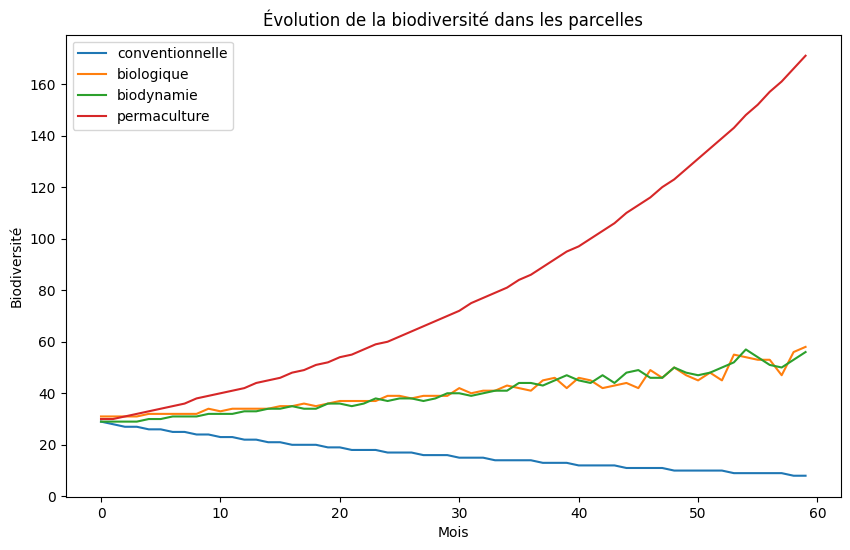

In [ ]:
import numpy as np
import random
import pandas as pd
from Bio import SeqIO
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.stats import entropy

# Chargement des fichiers FASTA
def load_fasta(file_path):
    records = list(SeqIO.parse(file_path, "fasta"))
    return records

selected_protist = load_fasta("selected_protist.fasta")
selected_fungi = load_fasta("selected_fungi.fasta")
selected_bacteria = load_fasta("selected_bacteria.fasta")

# Nombre d'individus au départ dans chaque parcelle
initial_biodiversity = {
    "conventionnelle": random.randint(27, 33),
    "biologique": random.randint(27, 33),
    "biodynamie": random.randint(27, 33),
    "permaculture": random.randint(27, 33)
}

# Paramètres pour l'évolution de la biodiversité
decline_rate = 0.02  # Taux de déclin de la biodiversité pour Parcelle1
increase_rate = 0.01  # Taux d'augmentation de la biodiversité pour Parcelle2 et Parcelle3
strong_increase_rate = 0.03  # Taux d'augmentation fort pour Parcelle4

# Nombre de mois dans la simulation
months = 60  # 5 ans x 12 mois

# Évolution de la biodiversité au fil du temps
biodiversity_data = {"conventionnelle": [], "biologique": [], "biodynamie": [], "permaculture": []}
species_data = {"conventionnelle": [], "biologique": [], "biodynamie": [], "permaculture": []}

# Liste pour stocker la biodiversité alpha de chaque parcelle à chaque mois
alpha_biodiversity = {"conventionnelle": [], "biologique": [], "biodynamie": [], "permaculture": []}

for month in range(months):
    for parcelle in biodiversity_data.keys():
        initial_population = int(initial_biodiversity[parcelle])
        if parcelle == "conventionnelle":
            initial_population = int(initial_population * (1 - decline_rate) ** month)
        elif parcelle == "biologique":
            # Générez un taux de légère augmentation aléatoire chaque mois
            random_increase_rate = random.uniform(increase_rate - 0.003, increase_rate + 0.001)
            initial_population = int(initial_population * (1 + random_increase_rate) ** month)
        elif parcelle == "biodynamie":
            # Générez un taux de légère augmentation aléatoire chaque mois
            random_increase_rate = random.uniform(increase_rate - 0.0003, increase_rate + 0.003)
            initial_population = int(initial_population * (1 + random_increase_rate) ** month)
        elif parcelle == "permaculture":
            initial_population = int(initial_population * (1 + strong_increase_rate) ** month)

        organisms = random.sample(selected_protist + selected_fungi + selected_bacteria, initial_population)
        biodiversity_data[parcelle].append(len(organisms))
        species_data[parcelle].append([organism.description for organism in organisms])

        # Calcul de la biodiversité alpha pour chaque parcelle
        unique_species = set([organism.description for organism in organisms])
        alpha_biodiversity[parcelle].append(len(unique_species))

# Calcul de la biodiversité gamma à la fin de l'expérience
all_species = set()
for parcelle in biodiversity_data.keys():
    all_species.update(species_data[parcelle][-1])
gamma_biodiversity = len(all_species)

# Créer un DataFrame Pandas pour stocker la biodiversité alpha
alpha_biodiversity_df = pd.DataFrame(alpha_biodiversity)

# Écrire les données dans un fichier Excel
with pd.ExcelWriter("biodiversity_simulation.xlsx", engine="openpyxl", mode="w") as writer:
    biodiversity_df = pd.DataFrame(biodiversity_data)  # Mettez à jour biodiversity_df avec les bonnes données
    biodiversity_df.to_excel(writer, sheet_name="Biodiversité", index=False)
    species_df = pd.DataFrame(species_data)  # Mettez à jour species_df avec les bonnes données
    species_df.to_excel(writer, sheet_name="Espèces", index=False)
    alpha_biodiversity_df.to_excel(writer, sheet_name="Biodiversité Alpha", index=False)

# Générer un graphique pour l'évolution de la biodiversité
plt.figure(figsize=(10, 6))
for parcelle, data in biodiversity_data.items():
    plt.plot(range(months), data, label=parcelle)

plt.xlabel("Mois")
plt.ylabel("Biodiversité")
plt.legend()
plt.title("Évolution de la biodiversité dans les parcelles")
plt.savefig("biodiversity_plot.png")

# Afficher la biodiversité gamma à la fin de l'expérience
print(f"Biodiversité gamma à la fin de l'expérience : {gamma_biodiversity}")

print("Les données de biodiversité, d'espèces et de biodiversité alpha ont été enregistrées dans biodiversity_simulation.xlsx.")


Les cellules suivantes sont des tests pas concluants

In [ ]:
#Tentative de cluster analysis pas concluante


sequences = []
descriptions = []
for record in SeqIO.parse("test_prot.fasta", "fasta"):
    descriptions.append(record.description)
    sequences.append(str(record.seq))


def jaccard_similarity(seq1, seq2):
    set1 = set(seq1)
    set2 = set(seq2)
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    return intersection / union


num_sequences = len(sequences)
similarity_matrix = np.zeros((num_sequences, num_sequences))
for i in range(num_sequences):
    for j in range(i, num_sequences):
        similarity_matrix[i, j] = jaccard_similarity(sequences[i], sequences[j])
        similarity_matrix[j, i] = similarity_matrix[i, j]


linkage_matrix = linkage(similarity_matrix, method='average')
threshold = 0.99
clusters = fcluster(linkage_matrix, threshold, criterion='distance')


cluster_dict = {}
for i, cluster_id in enumerate(clusters):
    if cluster_id not in cluster_dict:
        cluster_dict[cluster_id] = []
    cluster_dict[cluster_id].append((descriptions[i], sequences[i]))

for cluster_id, cluster_data in cluster_dict.items():
    print(f"Cluster {cluster_id}:")
    for description, sequence in cluster_data:
        print(f"{description}\n{sequence}\n")